### Applied Data Science Capstone Project Report - Code Notebook
Christopher Riper - October 2020

#### This notebook contains the code used for my Applied Data Science Capstone Project Report

In [1]:
# Libraries
import pandas as pd
import numpy as np

In [2]:
# load the data into a dataframe which had been downloaded locally from:
# https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

collision_df = pd.read_csv('Data-Collisions.csv')
collision_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
# examine column types
collision_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [4]:
'''
Examine some columns which do not appear useful per metadata for prediction
* OBJECTID
* INCKEY
* COLDETKEY
* REPORTNO
* STATUS
* EXCEPTRSNCODE
* EXCEPTRSNDESC
* SEVERITYCODE.1
* SDOTCOLNUM
* ST_COLCODE
* ST_COLDESC
* SEGLANEKEY

'''

collision_df[['OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY']].head(10)


,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY
0,1,1307,1307,3502005,Matched,,NaN,2,NaN,10,Entering at angle,0
1,2,52200,52200,2607959,Matched,NaN,NaN,1,6354039.0,11,From same direction - both going straight - bo...,0
2,3,26700,26700,1482393,Matched,NaN,NaN,1,4323031.0,32,One parked--one moving,0
3,4,1144,1144,3503937,Matched,,NaN,1,NaN,23,From same direction - all others,0
4,5,17700,17700,1807429,Matched,NaN,NaN,2,4028032.0,10,Entering at angle,0
5,6,320840,322340,E919477,Matched,,NaN,1,NaN,10,Entering at angle,0
6,7,83300,83300,3282542,Matched,NaN,NaN,1,8344002.0,10,Entering at angle,0
7,9,330897,332397,EA30304,Matched,,NaN,2,NaN,5,Vehicle Strikes Pedalcyclist,6855
8,10,63400,63400,2071243,Matched,NaN,NaN,1,6166014.0,32,One parked--one moving,0
9,12,58600,58600,2072105,Matched,NaN,NaN,2,6079001.0,10,Entering at angle,0


In [5]:
# drop columns that do not appear useful for prediction
collision_df.drop(['OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY'], axis = 1, inplace = True)


In [6]:
collision_df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INTKEY,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,0,N
1,1,-122.347294,47.647172,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,N
2,1,-122.334540,47.607871,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,NaN,0,N
3,1,-122.334803,47.604803,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,0,N
4,2,-122.306426,47.545739,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN,0,N


In [7]:
'''
SEVERITY
A code that corresponds to the severity of the collision per the metadata:
• 3—fatality
• 2b—serious injury
• 2—injury
• 1—prop damage
• 0—unknown
'''
collision_df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [8]:
# appears there are only two codes in this dataset compared to five listed in the metadata

In [9]:
# review the severity descriptions
collision_df['SEVERITYDESC'].value_counts() 

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

In [10]:
collision_df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [11]:
print("Earliest incident date: ", collision_df['INCDATE'].min())
print("Latest incident date: ", collision_df['INCDATE'].max())

Earliest incident date:  2004/01/01 00:00:00+00
Latest incident date:  2020/05/20 00:00:00+00


In [12]:
# Weather
collision_df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [13]:
# Road Conditions
collision_df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [14]:
# Light Conditions
collision_df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [15]:
# Correlation matrix

collision_df.corr()

,SEVERITYCODE,X,Y,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.006553,0.130949,0.246338,0.214218,-0.054686,0.188905,0.175093
X,0.010309,1.000000,-0.160262,0.120754,0.012887,0.011304,-0.001752,-0.012168,0.010904,0.013586
Y,0.017737,-0.160262,1.000000,-0.114935,-0.013850,0.010178,0.026304,0.017058,-0.019694,0.009508
INTKEY,0.006553,0.120754,-0.114935,1.000000,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.018420
PERSONCOUNT,0.130949,0.012887,-0.013850,0.001886,1.000000,-0.023464,-0.038809,0.380523,-0.128960,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,-0.004784,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.565326
PEDCYLCOUNT,0.214218,-0.001752,0.026304,0.000531,-0.038809,-0.016920,1.000000,-0.253773,0.382521,0.109820
VEHCOUNT,-0.054686,-0.012168,0.017058,-0.012929,0.380523,-0.261285,-0.253773,1.000000,-0.365814,-0.200526
SDOT_COLCODE,0.188905,0.010904,-0.019694,0.007114,-0.128960,0.260393,0.382521,-0.365814,1.000000,0.189518
CROSSWALKKEY,0.175093,0.013586,0.009508,0.018420,-0.032258,0.565326,0.109820,-0.200526,0.189518,1.000000


In [16]:
corr = collision_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,SEVERITYCODE,X,Y,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.006553,0.130949,0.246338,0.214218,-0.054686,0.188905,0.175093
X,0.010309,1.000000,-0.160262,0.120754,0.012887,0.011304,-0.001752,-0.012168,0.010904,0.013586
Y,0.017737,-0.160262,1.000000,-0.114935,-0.013850,0.010178,0.026304,0.017058,-0.019694,0.009508
INTKEY,0.006553,0.120754,-0.114935,1.000000,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.018420
PERSONCOUNT,0.130949,0.012887,-0.013850,0.001886,1.000000,-0.023464,-0.038809,0.380523,-0.128960,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,-0.004784,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.565326
PEDCYLCOUNT,0.214218,-0.001752,0.026304,0.000531,-0.038809,-0.016920,1.000000,-0.253773,0.382521,0.109820
VEHCOUNT,-0.054686,-0.012168,0.017058,-0.012929,0.380523,-0.261285,-0.253773,1.000000,-0.365814,-0.200526
SDOT_COLCODE,0.188905,0.010904,-0.019694,0.007114,-0.128960,0.260393,0.382521,-0.365814,1.000000,0.189518
CROSSWALKKEY,0.175093,0.013586,0.009508,0.018420,-0.032258,0.565326,0.109820,-0.200526,0.189518,1.000000


In [17]:
road_cond = pd.get_dummies(collision_df['ROADCOND'])
road_cond = pd.concat([collision_df['SEVERITYCODE'], road_cond], axis = 1)
road_cond.head()

,SEVERITYCODE,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,2,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,1


In [18]:
road_cond.shape

(194673, 10)

In [19]:
road_cond_sum = road_cond.groupby('SEVERITYCODE').sum()
road_cond_sum

,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
SEVERITYCODE,,,,,,,,,
1,84446.0,936.0,40.0,89.0,52.0,837.0,85.0,14329.0,31719.0
2,40064.0,273.0,24.0,43.0,23.0,167.0,30.0,749.0,15755.0


<AxesSubplot:xlabel='SEVERITYCODE'>

<Figure size 432x288 with 0 Axes>

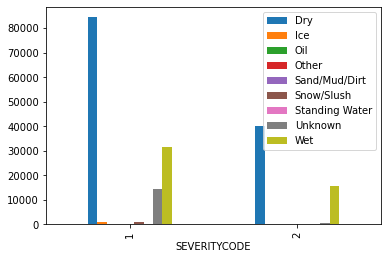

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()

road_cond_sum.plot.bar()

In [21]:
# What time of day did these accidents occur?
collision_df['INCDTTM'].head()

0      3/27/2013 2:54:00 PM
1     12/20/2006 6:55:00 PM
2    11/18/2004 10:20:00 AM
3      3/29/2013 9:26:00 AM
4      1/28/2004 8:04:00 AM
Name: INCDTTM, dtype: object

In [22]:
# first, convert to a datetime
collision_df['INCDTTM']= pd.to_datetime(collision_df['INCDTTM']) 
collision_df['INCDTTM'].head()

0   2013-03-27 14:54:00
1   2006-12-20 18:55:00
2   2004-11-18 10:20:00
3   2013-03-29 09:26:00
4   2004-01-28 08:04:00
Name: INCDTTM, dtype: datetime64[ns]

In [23]:
# add the hour
collision_df['Hour'] = pd.DatetimeIndex(collision_df['INCDTTM']).hour
collision_df['Hour'].head()

0    14
1    18
2    10
3     9
4     8
Name: Hour, dtype: int64

In [24]:
# create a dataframe of just the hour from the incident date/time and severity code (1 or 2) of each accident
incident_hour = pd.concat([collision_df['Hour'], pd.get_dummies(collision_df['SEVERITYCODE'])], axis = 1)
incident_hour.head()

,Hour,1,2
0,14,0,1
1,18,1,0
2,10,1,0
3,9,1,0
4,8,0,1


In [25]:
hour_sum = incident_hour.groupby('Hour').sum()
hour_sum

,1,2
Hour,,
0,25129.0,9252.0
1,2577.0,831.0
2,2736.0,870.0
3,1316.0,349.0
4,950.0,272.0
5,1178.0,489.0
6,2182.0,1017.0
7,4389.0,2154.0
8,5878.0,2692.0


In [26]:
# a large number of accidents occur during the midnight hour -- is something going on with those?  let's look at a few

collision_df[['SEVERITYCODE','LOCATION','WEATHER','ROADCOND','LIGHTCOND','INCDTTM','Hour']].loc[collision_df['Hour'] == 0].head(10)


,SEVERITYCODE,LOCATION,WEATHER,ROADCOND,LIGHTCOND,INCDTTM,Hour
6,1,DENNY WAY AND WESTLAKE AVE,Raining,Wet,Daylight,2008-12-09,0
15,1,9TH AVE BETWEEN LENORA ST AND BLANCHARD ST,NaN,NaN,NaN,2020-04-20,0
16,2,AURORA AVE N AND N 87TH ST,Overcast,Dry,Daylight,2005-07-01,0
19,1,41ST AVE SW BETWEEN SW WALKER ST AND SW COLLEG...,Unknown,Dry,Unknown,2009-06-01,0
30,1,9TH AVE AND JAMES ST,Raining,Wet,Dark - Street Lights On,2005-11-05,0
36,1,OLIVE WAY BETWEEN 6TH AVE AND 7TH AVE,NaN,NaN,NaN,2020-03-13,0
40,1,PINEHURST WAY NE AND NE 115TH ST,Clear,Dry,Daylight,2006-08-05,0
53,2,BEACON AVE S AND BEACON WR N AVE S,NaN,NaN,NaN,2020-04-18,0
55,1,E THOMAS ST BETWEEN 15TH S AVE E AND 16TH AVE E,Raining,Wet,Dark - Street Lights On,2006-04-01,0
60,1,OLSON PL SW BETWEEN 1ST AVE S AND 2ND AVE SW,NaN,NaN,NaN,2020-04-20,0


In [27]:
# The results dont make sense - several of the records indicate daylight conditions, but 0 hour is midnight. 
# These must be records where the hour of the incident is not available.

# check some records where the hour is 12 (noon) to if the light conditions make sense

collision_df[['SEVERITYCODE','LOCATION','WEATHER','ROADCOND','LIGHTCOND','INCDTTM','Hour']].loc[collision_df['Hour'] == 12].head(10)

,SEVERITYCODE,LOCATION,WEATHER,ROADCOND,LIGHTCOND,INCDTTM,Hour
12,1,SW SPOKANE ST BETWEEN SW SPOKANE W BR AND TERM...,Raining,Wet,Dark - Street Lights On,2006-05-17 12:51:00,12
39,1,42ND AVE SW AND SW FINDLAY ST,Clear,Dry,Daylight,2006-08-19 12:09:00,12
67,2,RAINIER AVE S BETWEEN S NORMAN ST AND I90 WB R...,Clear,Dry,Daylight,2004-09-30 12:40:00,12
70,1,32ND AVE S BETWEEN S COLLEGE ST AND S BAYVIEW ST,Unknown,Unknown,Daylight,2014-01-06 12:00:00,12
73,1,S BYRON ST BETWEEN RAINIER AVE S AND WETMORE A...,Clear,Dry,Daylight,2013-03-28 12:40:00,12
112,1,36TH AVE BETWEEN E TERRACE ST AND E CHERRY ST,Overcast,Dry,Daylight,2019-04-25 12:00:00,12
140,1,15TH AVE NE BETWEEN NE 42ND ST AND NE 43RD ST,Clear,Dry,Daylight,2005-10-21 12:45:00,12
151,1,5TH AVE NE AND NE 145TH ST,Overcast,Dry,Daylight,2019-05-12 12:06:00,12
162,2,MELROSE AV ON RP BETWEEN MELROSE AVE AND OLIVE...,Clear,Dry,Daylight,2019-07-01 12:50:00,12
172,2,N 80TH ST BETWEEN 1ST AVE NW AND GREENWOOD AVE N,Clear,Dry,Daylight,2005-08-14 12:07:00,12


In [28]:
# Better - the first record (index 13) indicates dark conditions, but it was also raining.

#### Methodology

The data exploration phase has revealed numerous potential accident attributes which can be considered for our machine learning model.  The dependent variable (SEVERITYCODE) is not perfectly balanced, but not so skewed such that I will try and balance unless it causes issues with our model.

I will attempt to make a prediction using two classification models: decision tree and logistic regression.  

To make our prediction I will use data points which would likely be "known" to a driver prior to leaving on a trip: weather conditions (WEATHER), road conditions (ROADCOND), and the light conditions (LIGHTCOND).  I could use the time of day (hour) however in the data exploration phase it was noted that many records did not specify the time of day, and the lighting conditions is likely a better indicator.

Each of the three attributes selected for our model has 8+ values, several of which appear to be used infrequently. To simplify the model these various values will be aggregated.

The data will then be split into training and test datasets, and the models will be evaluated.

In [29]:
# data pre-processing
# we want to create a dataset which is limited to relevant fields
# we are also going to aggregate the values of these relevant fields to simplify the model
collision_df.loc[(collision_df['WEATHER'] == 'Clear') | (collision_df['WEATHER'] == 'Partly Cloudy'),'Weather_Agg'] = 'Weather_Clear'
collision_df.loc[(collision_df['WEATHER'] == 'Raining') | (collision_df['WEATHER'] == 'Overcast') | (collision_df['WEATHER'] == 'Unknown'),'Weather_Agg'] = 'Weather_Bad'
collision_df.loc[(collision_df['Weather_Agg'].isnull()),'Weather_Agg'] = 'Weather_Impaired'

collision_df['Weather_Agg'].value_counts()

Weather_Clear       111140
Weather_Bad          75950
Weather_Impaired      7583
Name: Weather_Agg, dtype: int64

In [30]:
# road conditions
collision_df.loc[(collision_df['ROADCOND'] == 'Dry'),'Road_Agg'] = 'Road_Dry'
collision_df.loc[(collision_df['ROADCOND'] == 'Wet') | (collision_df['ROADCOND'] == 'Unknown'),'Road_Agg'] = 'Road_Wet'
collision_df.loc[(collision_df['Road_Agg'].isnull()),'Road_Agg'] = 'Road_Impaired'

collision_df['Road_Agg'].value_counts()

Road_Dry         124510
Road_Wet          62552
Road_Impaired      7611
Name: Road_Agg, dtype: int64

In [31]:
# light conditions
collision_df.loc[(collision_df['LIGHTCOND'] == 'Daylight'),'Light_Agg'] = 'Light_Daylight'
collision_df.loc[(collision_df['LIGHTCOND'] == 'Dawn') | (collision_df['LIGHTCOND'] == 'Dusk') | (collision_df['LIGHTCOND'] == 'Unknown'),'Light_Agg'] = 'Light_DawnDusk'
collision_df.loc[(collision_df['Light_Agg'].isnull()),'Light_Agg'] = 'Light_Impaired'

collision_df['Light_Agg'].value_counts()

Light_Daylight    116137
Light_Impaired     56659
Light_DawnDusk     21877
Name: Light_Agg, dtype: int64

In [32]:
# build our dataset for the model
df_model = pd.concat([
    collision_df['SEVERITYCODE'],
    pd.get_dummies(collision_df['Weather_Agg']),
    pd.get_dummies(collision_df['Road_Agg']),
    pd.get_dummies(collision_df['Light_Agg'])
    ], axis = 1)

print(df_model.shape)
df_model.head()

(194673, 10)


,SEVERITYCODE,Weather_Bad,Weather_Clear,Weather_Impaired,Road_Dry,Road_Impaired,Road_Wet,Light_DawnDusk,Light_Daylight,Light_Impaired
0,2,1,0,0,0,0,1,0,1,0
1,1,1,0,0,0,0,1,0,0,1
2,1,1,0,0,1,0,0,0,1,0
3,1,0,1,0,1,0,0,0,1,0
4,2,1,0,0,0,0,1,0,1,0


In [33]:
df_model.dtypes

SEVERITYCODE        int64
Weather_Bad         uint8
Weather_Clear       uint8
Weather_Impaired    uint8
Road_Dry            uint8
Road_Impaired       uint8
Road_Wet            uint8
Light_DawnDusk      uint8
Light_Daylight      uint8
Light_Impaired      uint8
dtype: object

In [34]:
# split data into training and test datasets
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [65]:
feature_df = df_model.drop('SEVERITYCODE', axis=1)
X = np.asarray(feature_df)
X[0:5]

array([[1, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0]], dtype=uint8)

In [66]:
y = np.asarray(df_model['SEVERITYCODE'])
y [0:5]

array([2, 1, 1, 1, 2])

In [43]:
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=4)
#print ('Train set:', X_train.shape,  y_train.shape)
#print ('Test set:', X_test.shape,  y_test.shape)

Train set: (97336, 9) (97336,)
Test set: (97337, 9) (97337,)


In [67]:
# Decision tree training and test sets
tree_X_train, tree_X_test, tree_y_train, tree_y_test = train_test_split( X, y, test_size=0.3, random_state=3)
print ('Decision tree train set:', tree_X_train.shape,  tree_y_train.shape)
print ('Test set:', tree_X_test.shape,  tree_y_test.shape)

Decision tree train set: (136271, 9) (136271,)
Test set: (58402, 9) (58402,)


In [68]:
# Decision tree model
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
tree.fit(tree_X_train,tree_y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
predTree = tree.predict(tree_X_test)

In [71]:
print (predTree [0:5])
print (tree_y_test [0:5])

[1 1 1 1 1]
[1 1 1 2 1]


In [72]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(tree_y_test, predTree))

DecisionTrees's Accuracy:  0.6994109790760591


In [73]:
# lets use logistic regression as well - lets just use the same training/test sets for now
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(tree_X_train,tree_y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
yhat_LR = LR.predict(tree_X_test)
yhat_LR[0:5]

array([1, 1, 1, 1, 1])

In [75]:
# F1-score
metrics.f1_score(tree_y_test, yhat_LR, average='weighted') 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5757003146091101

In [76]:
# Jaccard index for accuracy
metrics.jaccard_similarity_score(tree_y_test, yhat_LR)

0.6994109790760591

In [77]:
# what if we increasing our training set size and run a new logistic regression?

# Second training and test sets
second_X_train, second_X_test, second_y_train, second_y_test = train_test_split( X, y, test_size=0.2, random_state=2)
print ('Second train set:', second_X_train.shape,  second_y_train.shape)
print ('Second test set:', second_X_test.shape,  second_y_test.shape)

Second train set: (155738, 9) (155738,)
Second test set: (38935, 9) (38935,)


In [78]:
LR2 = LogisticRegression(C=0.01, solver='liblinear').fit(second_X_train,second_y_train)
LR2

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
second_yhat_LR = LR2.predict(second_X_test)
second_yhat_LR[0:5]

array([1, 1, 1, 1, 1])

In [80]:
# F1-score
metrics.f1_score(second_y_test, second_yhat_LR, average='weighted') 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5754798171509922

In [81]:
# Jaccard index for accuracy
metrics.jaccard_similarity_score(second_y_test, second_yhat_LR)

0.6992423269551817

In [82]:
# still bad!  let's try adding another attribute to the model

# how about person count?  PERSONCOUNT

collision_df['PERSONCOUNT'].value_counts()

2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

In [83]:
# build a new model that includes PERSONCOUNT

# build our dataset for the model
df_model2 = pd.concat([
    collision_df['SEVERITYCODE'],
    pd.get_dummies(collision_df['Weather_Agg']),
    pd.get_dummies(collision_df['Road_Agg']),
    pd.get_dummies(collision_df['Light_Agg']),
    collision_df['PERSONCOUNT']
    ], axis = 1)

print(df_model2.shape)
df_model2.head()

(194673, 11)


,SEVERITYCODE,Weather_Bad,Weather_Clear,Weather_Impaired,Road_Dry,Road_Impaired,Road_Wet,Light_DawnDusk,Light_Daylight,Light_Impaired,PERSONCOUNT
0,2,1,0,0,0,0,1,0,1,0,2
1,1,1,0,0,0,0,1,0,0,1,2
2,1,1,0,0,1,0,0,0,1,0,4
3,1,0,1,0,1,0,0,0,1,0,3
4,2,1,0,0,0,0,1,0,1,0,2


In [84]:
feature_df2 = df_model2.drop('SEVERITYCODE', axis=1)
X2 = np.asarray(feature_df2)
X2[0:5]

array([[1, 0, 0, 0, 0, 1, 0, 1, 0, 2],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 2],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 4],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 3],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 2]])

In [85]:
y2 = np.asarray(df_model2['SEVERITYCODE'])
y2 [0:5]

array([2, 1, 1, 1, 2])

In [86]:
X_train3, X_test3, y_train3, y_test3 = train_test_split( X2, y2, test_size=0.2, random_state=2)
print ('Third train set:', X_train3.shape, y_train3.shape)
print ('Third test set:', X_test3.shape, y_test3.shape)

Third train set: (155738, 10) (155738,)
Third test set: (38935, 10) (38935,)


In [87]:
LR3 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train3,y_train3)
LR3

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
yhat_LR3 = LR3.predict(X_test3)
yhat_LR3[0:5]

array([1, 1, 1, 1, 1])

In [89]:
# F1-score
metrics.f1_score(y_test3, yhat_LR3, average='weighted') 

0.5924908277803533

In [90]:
# Jaccard index for accuracy
metrics.jaccard_similarity_score(y_test3, yhat_LR3)

0.7006806215487351

In [ ]:
# very slightly better!

#### Results

I built four models, each with very similar results: 

1. Decision Tree - This model used a 70%/30% split between training/testing data.  The resulting accuracy score was 0.6994109790760591. 
2. Logistic Regression 1 - This model used the same 70%/30% split between training/testing data as the Decision Tree.  The resulting accuracy score was 0.6994109790760591.
3. Logistic Regression 2 - This model was similar to Logistic Regression 1 but the data was split 80%/20% for training/testing. The resulting accuracy score was 0.6992423269551817.
4. Logistic Regression 3 - This model added a feature, the number of persons involved in the accident. Data was split 80%/20% for training/testing. The resulting accuracy score was 0.7006806215487351.
